In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = "dataset/image_folder/output_folder/image_2549.jpg"

# Camera's intrinsic parameters
K = np.array([
    [698.86, 000.00, 306.91],
    [000.00, 699.13, 150.34],
    [000.00, 000.00, 001.00]
])

# Camera's distortion coefficients
d = np.array([0.191887, -0.563680, -0.0036176, -0.002037, 0.000])

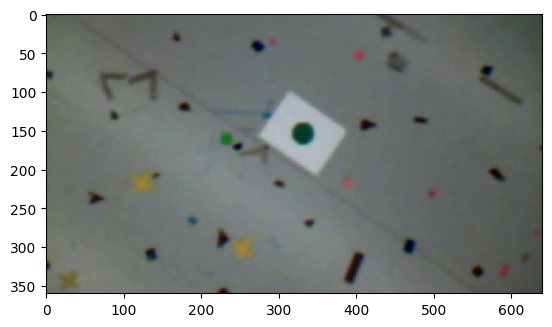

In [76]:
# display the image
image = cv2.imread(img)
plt.imshow(image)
plt.show()

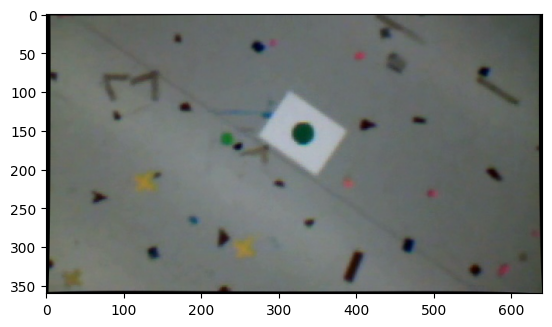

In [77]:
# undistort the image
undistorted_image = cv2.undistort(image, K, d)
plt.imshow(undistorted_image)
plt.show()

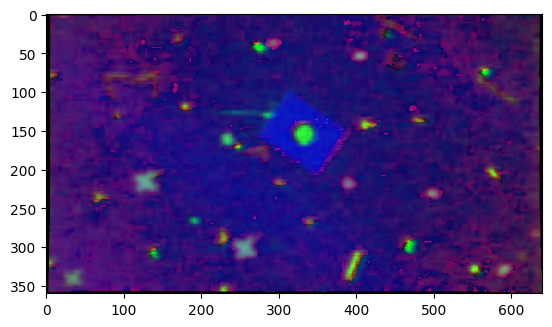

In [78]:
hsv = cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

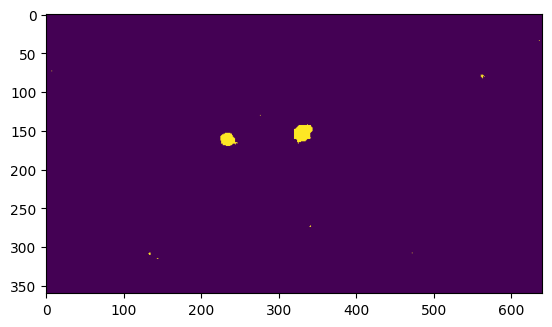

In [79]:
lower_green = np.array([35, 70, 20])
upper_green = np.array([80, 255, 255])

# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv, lower_green, upper_green)
plt.imshow(mask)
plt.show()


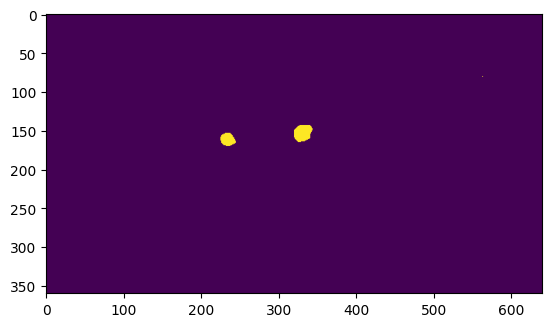

In [80]:
# remove noise
blur = cv2.medianBlur(mask, 5)
plt.imshow(blur)
plt.show()

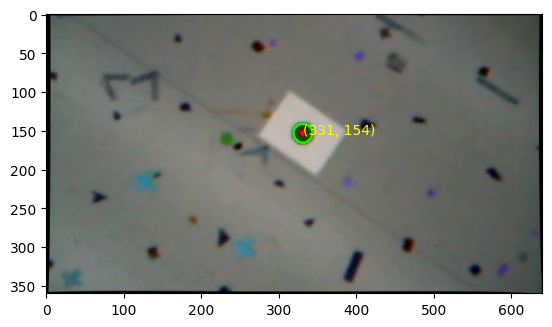

In [81]:
# using contours method
contours, _ = cv2.findContours(blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB)
# write center of circle on image, (i[0], i[1]) is the center in cyan color
for contour in contours:
        # Compute perimeter
        perimeter = cv2.arcLength(contour, True)
        
        # Compute area
        area = cv2.contourArea(contour)
        
        # Avoid division by zero
        if perimeter == 0:
            continue
        
        # Compute circularity
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        
        # Check if the contour is approximately circular
        if circularity > 0.7:  # Threshold close to 1 (ideal circle)
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            
            if 10 < radius <= 100:
                cv2.circle(undistorted_image, center, radius, (0, 255, 0), 2)
                cv2.circle(undistorted_image, center, 2, (0, 0, 255), 3)
                image_rgb = cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB)
                plt.text(int(x), int(y), f'({int(x)}, {int(y)})', color='yellow')
plt.imshow(image_rgb)
plt.show()